## PCA - applied to the IRIS data set

### Preparing environment - loading packages and data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn import metrics

In [2]:
url = "https://raw.githubusercontent.com/Jacob-Gernay/SCP8082660/main/data/Iris.csv"
iris = pd.read_csv(url)
iris.head()

X, y = iris.iloc[:,1:5].values, iris.loc[:,'Species'].values
print(X.shape, y.shape)

(150, 4) (150,)


### Standardizing the data

In [3]:
scaler = StandardScaler()
scaler.fit_transform(X);

### Applying PCA

In [4]:
pca = PCA(n_components=4)
pca.fit_transform(X);

### Analyzing results

Proportion of explained variance:
   prop_var  cumulative
0  0.924616    0.924616
1  0.053016    0.977632
2  0.017185    0.994817
3  0.005183    1.000000


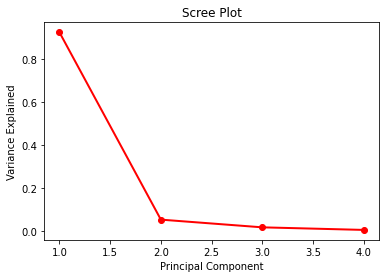

In [5]:
prop_var = pca.explained_variance_ratio_
pca_var_tab = pd.DataFrame(prop_var, columns = ['prop_var'])
pca_var_tab['cumulative'] = pca_var_tab['prop_var'].cumsum(axis = 0)
print('Proportion of explained variance:')
print(pca_var_tab)

PC_values = np.arange(pca.n_components_) + 1
plt.plot(PC_values, pca.explained_variance_ratio_, 'o-', linewidth=2, color='red')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.show()

Scree plot suggest 2 PC's are enough, 2 components explain 97.76% of the variance in the original data.

## Classification: raw data vs. 2 components

### preparing data

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

pca2 = PCA(n_components = 2)
X_train_pc = pca2.fit_transform(X_train)
X_test_pc = pca2.transform(X_test)

### classifying

In [7]:
classifier = LogisticRegression(multi_class = 'multinomial')
classifier_pc = LogisticRegression(multi_class = 'multinomial')

classifier.fit(X_train, y_train)
classifier_pc.fit(X_train_pc, y_train)

y_pred = classifier.predict(X_test)
y_pred_pc = classifier_pc.predict(X_test_pc)

### Evaluation of the classification

In [8]:
cm = confusion_matrix(y_test, y_pred)
cm_pc = confusion_matrix(y_test, y_pred_pc)

acc_raw = round(metrics.accuracy_score(y_test, y_pred)*100,2)
acc_pc = round(metrics.accuracy_score(y_test, y_pred_pc)*100,2)

print(cm)
print("accuracy raw data:", acc_raw)

print(cm_pc)
print("accuracy principal components:", acc_pc)

[[16  0  0]
 [ 0 17  1]
 [ 0  0 11]]
accuracy raw data: 97.78
[[16  0  0]
 [ 0 17  1]
 [ 0  0 11]]
accuracy principal components: 97.78


the classification on the 2 principal components is as good as the classification based on the original data.